<a href="https://colab.research.google.com/github/surabhi13gupta/Linear-Timeseries-Modelling/blob/main/Autoregressive_Moving_Average_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Learning Objectives

At the end of the experiment, you will be able to

* know autoregressive AR models
* know moving average MA models
* know autoregressive moving average ARMA models
* select optimum AR and MA terms for ARMA models
* predict future instances using ARMA model for Industrial production data

In [1]:
from IPython import get_ipython

ipython = get_ipython()
ipython.magic("sx pip -q install astsadata")
ipython.magic("sx wget https://cdn.iisc.talentsprint.com/CDS/Datasets/google_stock.csv")
ipython.magic("sx wget https://cdn.iisc.talentsprint.com/CDS/Datasets/electric_production.csv")

['--2025-08-02 17:50:26--  https://cdn.iisc.talentsprint.com/CDS/Datasets/electric_production.csv',
 'Resolving cdn.iisc.talentsprint.com (cdn.iisc.talentsprint.com)... 172.105.52.210',
 'Connecting to cdn.iisc.talentsprint.com (cdn.iisc.talentsprint.com)|172.105.52.210|:443... connected.',
 'HTTP request sent, awaiting response... 200 OK',
 'Length: 7318 (7.1K) [application/octet-stream]',
 'Saving to: ‘electric_production.csv’',
 '',
 '',
 'electric_production   0%[                    ]       0  --.-KB/s               ',
 'electric_production 100%[===================>]   7.15K  --.-KB/s    in 0s      ',
 '',
 '2025-08-02 17:50:27 (2.29 GB/s) - ‘electric_production.csv’ saved [7318/7318]',
 '']

### Import required packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tseries.offsets import DateOffset
import warnings
warnings.filterwarnings("ignore")
import statsmodels.tsa.api as sm
from astsadata import rec
import statsmodels
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

**Example 1:** We will analyze the dataset to identify the order of an autoregressive model i.e, `p`value and create an autoregressive model for prediction.

**Dataset Description:**

The data set (google_stock.csv) consists of $n = 105$ values which are the closing stock price of a share of Google stock from `2-7-2005` to `7-7-2005`.

In [3]:
# Read data
df = pd.read_csv("google_stock.csv")
df.head()

,date,price
0,2/7/2005,196.03
1,2/8/2005,198.64
2,2/9/2005,191.58
3,2/10/2005,187.98
4,2/11/2005,187.40


 A plot of the stock prices versus time is presented below:

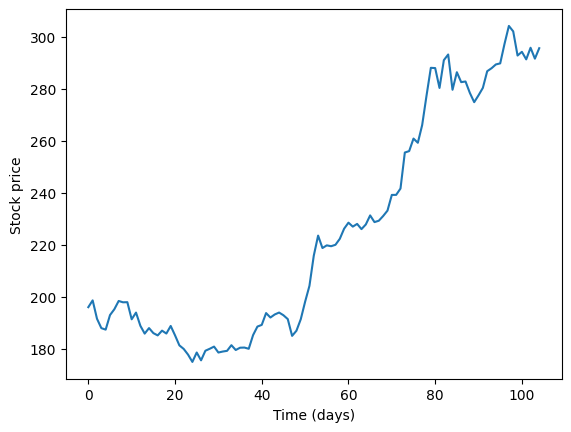

In [4]:
# Visualize stock prices
plt.plot(df['price'])
plt.xlabel("Time (days)")
plt.ylabel("Stock price")
plt.show()

**ARMA Model**

Let us now apply the ARMA model (Autoregressive {p} Moving Average {q}). The model has 2 parameters

**p** - the parameter associated with the Auto-Regressive part of the ARMA model. We can use the PACF (partial autocorrelation function) plot to find the optimal p value.

**q** - the parameter associated with the Moving Average part of the ARMA model. We can use the ACF (autocorrelation function) plot to find the optimal q value.

To know more about how to choose the AR(p) and MA(q) terms, click [here](https://people.duke.edu/~rnau/arimrule.htm).

Let's plot the PACF first.

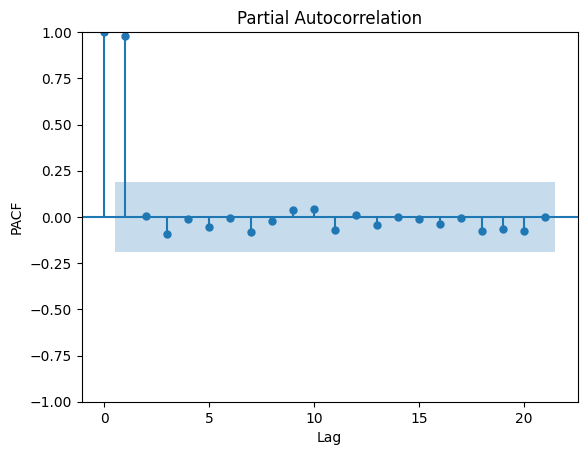

In [5]:
# Visualize PACF
plot_pacf(df['price'])
plt.xlabel("Lag")
plt.ylabel("PACF")
plt.show()

From the above partial autocorrelation plot, we can select the p-value as 1.

In [6]:
# Create AR(1) model
ar = sm.ARIMA(df['price'], order=(1, 0, 0))
r1 = ar.fit()
print(r1.summary())

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                  105
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -309.860
Date:                Sat, 02 Aug 2025   AIC                            625.719
Time:                        17:51:40   BIC                            633.681
Sample:                             0   HQIC                           628.945
                                - 105                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        242.2343     46.699      5.187      0.000     150.707     333.762
ar.L1          0.9957      0.011     92.871      0.000       0.975       1.017
sigma2        20.4715      2.345      8.728      0.0

We can access the AIC score of the model as follows:

In [7]:
# AIC score
r1.aic

np.float64(625.7191373830999)

The **Akaike information criterion (AIC)** is an estimator of prediction error and thereby the relative quality of statistical models for a given set of data. Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models. Thus, AIC provides a means for model selection.

In simple words, AIC is a single number score that can be used to determine which of multiple models is most likely to be the best model for a given dataset. It estimates models relatively, meaning that AIC scores are only useful in comparison with other AIC scores for the same dataset. A **lower AIC score is better**.

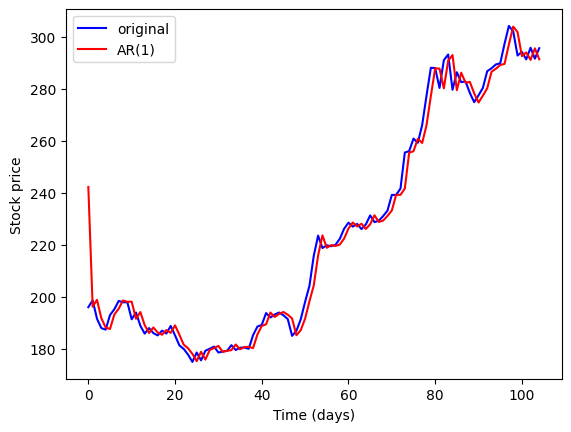

In [8]:
# Visualize prediction

plt.plot(df['price'], 'b', label="original")
plt.plot(r1.predict(), 'r', label="AR(1)")
plt.legend()
plt.xlabel("Time (days)")
plt.ylabel("Stock price")
plt.show()

**Example 2:** Here we first simulate MA process data with $\theta = 0.5$ and visualize the prediction using the MA model.

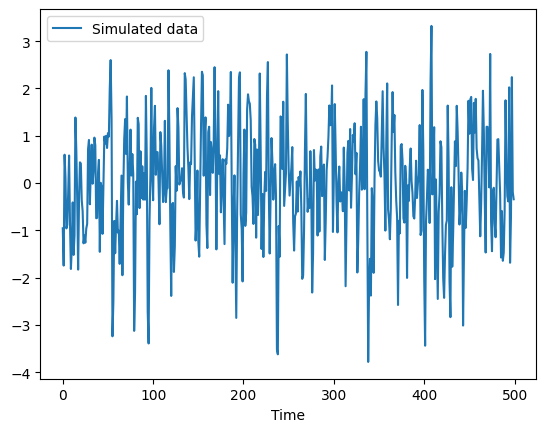

In [9]:
# Simulating an MA Process

# AR terms order
ar = np.array([1])
# MA terms order
ma = np.array([1, 0.5])
AR_object = ArmaProcess(ar, ma)
# Generate 500 samples
simulated_data = AR_object.generate_sample(nsample=500)

# Visualize simulated data
plt.plot(simulated_data, label="Simulated data")
plt.xlabel("Time")
plt.legend()
plt.show()

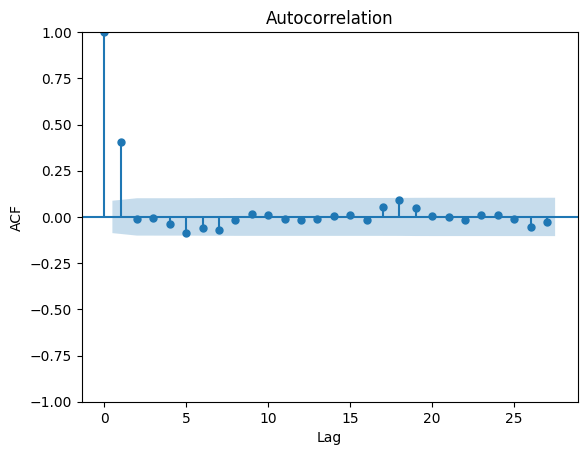

In [10]:
# Visualize ACF of simulated data
plot_acf(simulated_data)
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.show()

From the above autocorrelation plot, we can select the q-value as 1.

In [14]:
# Forecasting an MA Model
mod = sm.ARIMA(simulated_data, order=(0, 0, 1))
res = mod.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  500
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -739.316
Date:                Sat, 02 Aug 2025   AIC                           1484.632
Time:                        17:53:58   BIC                           1497.276
Sample:                             0   HQIC                          1489.593
                                - 500                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0199      0.073      0.273      0.785      -0.123       0.163
ma.L1          0.5202      0.038     13.673      0.000       0.446       0.595
sigma2         1.1261      0.069     16.402      0.0

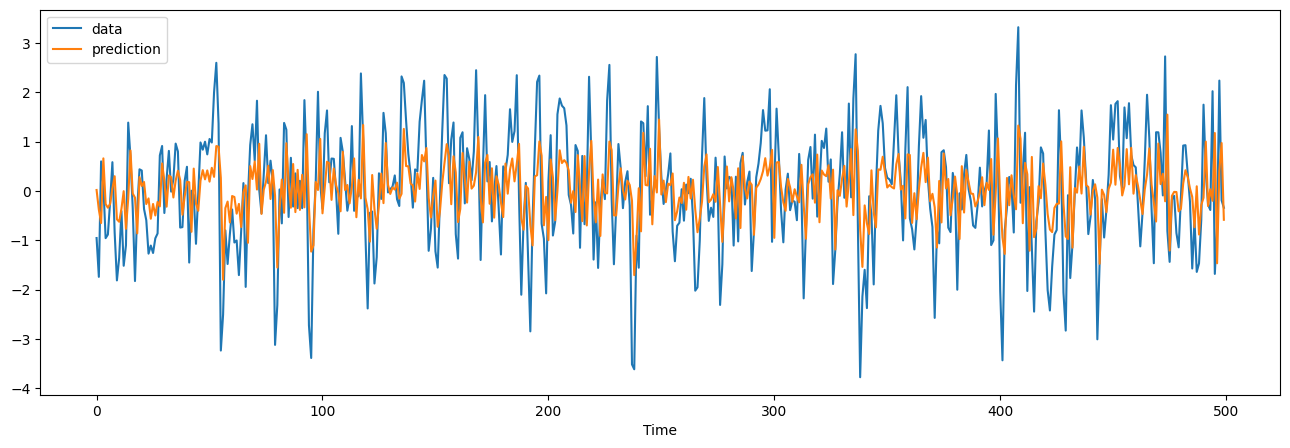

In [15]:
# Visualize prediction
plt.figure(figsize=(16,5))
plt.plot(simulated_data, label='data')
plt.plot(res.predict(), label='prediction')
plt.legend()
plt.xlabel("Time")
plt.show()

### Autoregressive Moving Average Models

**Example 3:** We will analyze the `google_stock` dataset to identify the order of a moving average model i.e, `q`value and create an autoregressive moving average model for prediction.

From the first example, we know the p-value = 1.

We can use the ACF (autocorrelation function) plot to find the optimal q value.

Let's plot the autocorrelation function.

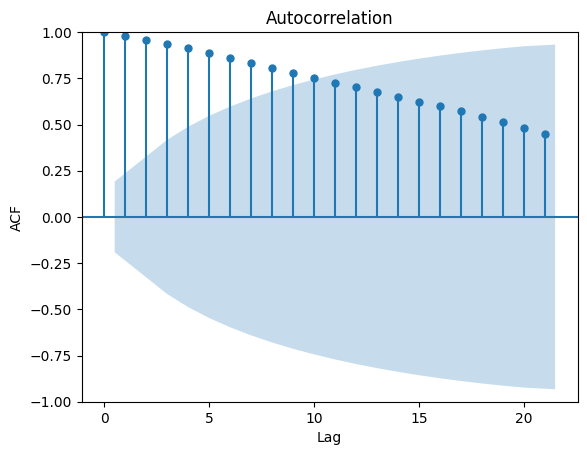

In [16]:
# Visualize ACF
plot_acf(df['price'])
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.show()

From the above autocorrelation plot, we can select the q-value as 10.

In [17]:
# Create ARMA(p=1, q=10)
arma = sm.ARIMA(df['price'].values, order=(1, 0,10))
r2 = arma.fit()
print(r2.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  105
Model:                ARIMA(1, 0, 10)   Log Likelihood                -306.802
Date:                Sat, 02 Aug 2025   AIC                            639.605
Time:                        17:55:07   BIC                            674.106
Sample:                             0   HQIC                           653.585
                                - 105                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        224.7949     75.757      2.967      0.003      76.313     373.276
ar.L1          0.9908      0.022     46.004      0.000       0.949       1.033
ma.L1          0.1415      0.100      1.421      0.1

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


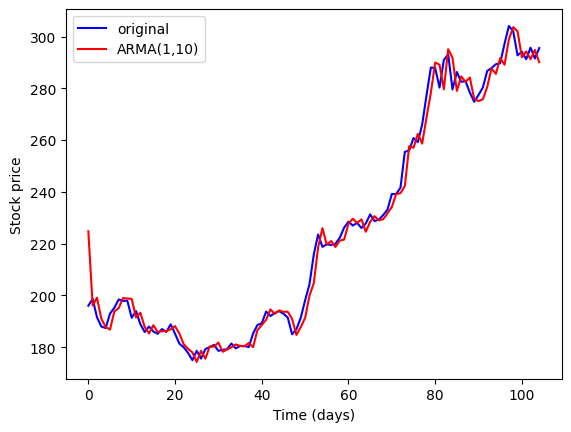

In [18]:
# Visualize prediction

plt.plot(df['price'], 'b', label="original")
plt.plot(r2.predict(), 'r', label="ARMA(1,10)")
plt.legend()
plt.xlabel("Time (days)")
plt.ylabel("Stock price")
plt.show()

**Example 4: Forecasting the Recruitment Series**

Recruitment series contains the number of new fish furnished by Dr. Roy Mendelssohn of the Pacific Environmental Fisheries Group. The series is for a period of 453 months ranging over the years 1950–1987.

Using the parameter estimates as the actual parameter values, let's forecast the Recruitment series over a 24-month horizon, m = 1, 2, . . ., 24. The actual forecasts are calculated as

$$x^n_{n+m} = 6.74 + 1.35x^n_{n+m−1} − .46x^n_{n+m−2}$$

for $n = 453$ and $m = 1, 2, . . ., 12.$

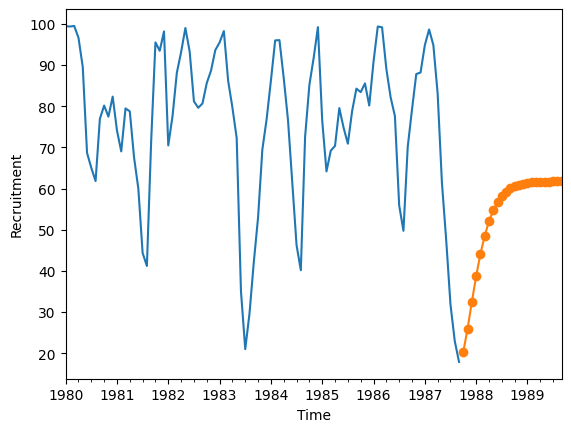

In [19]:
# Create an AR model
regr = statsmodels.tsa.ar_model.AutoReg(rec, lags=2).fit()
# Predict next 23 instances
fore = regr.predict(start=len(rec), end=len(rec) + 23)

# Visualize forecasts
rec["1980":].plot(xlabel="Time", ylabel="Recruitment", legend=False)
fore.plot(marker="o")
plt.show()

**Example 5: Backcasting an ARMA(1, 1)**

Consider an ARMA(1, 1) process, $x_t = \phi x_{t−1} + θw_{t−1} + w_t$
; we will call this the
forward model.  Assuming the models are Gaussian, we also have that minimum mean square error prediction backward in time is the same as forward in time for ARMA models. Thus, the process can equivalently be generated by the backward model,

$$x_t = \phi x_{t+1} + θv_{t+1} + v_t,$$

where $v_t$ is a Gaussian white noise process with variance $σ^2_w$.

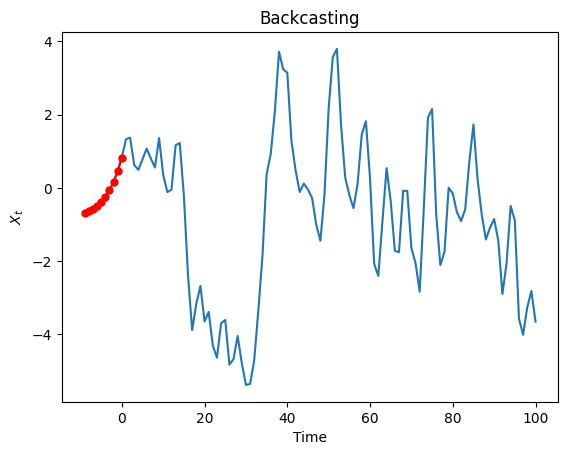

In [20]:
np.random.seed(90210)

# Generate ARMA process samples with ϕ = -0.9 and θ = 0.5
x = sm.arma_generate_sample(ar=[1, -.9], ma=[1, .5], nsample=100)
# xr is the reversed data
xr = np.flip(x)

# predict the reversed data upto 9 instances
pxr = sm.ARIMA(xr, order=(1, 0, 1)).fit().predict(len(x), len(x) + 9)

# reorder the predictors (for plotting)
pxrp = np.flip(pxr)

# attach the backcasts to the data
nx = pd.Series([*pxrp, *x], index=np.arange(-9, 101))

# Visualize backcasts
nx.plot(xlabel="Time", ylabel=r"$X_{t}$", title="Backcasting")
nx.iloc[:10].plot(marker="o", color="red", markersize=5)
plt.show()

**Example 6:** Here we use the ARMA model to predict the future values for the seasonal Industrial production data.

**Dataset Description**

The dataset is the Industrial production of electric and gas utilities in the United States, from the years 1985–2018. It contains monthly data starting from 1/1/1985 to 1/1/2018 having 12 entries per year.

This data measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

In [21]:
# Read data
df1 = pd.read_csv("electric_production.csv")
df1.columns = ['Date','Production']
df1.head()

,Date,Production
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


To work with time series data, the 'date' column is converted into a datetime index.

In [22]:
# Convert Date column to datetime index
df1['Date'] = pd.to_datetime(df1['Date'])
df2 = df1.set_index('Date')
df2.head()

,Production
Date,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


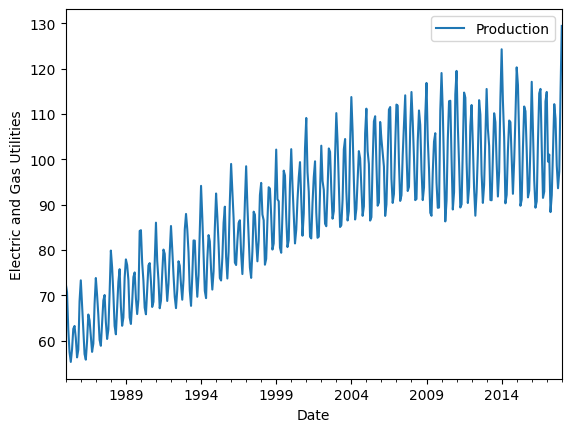

In [23]:
# Visualization of data
df2.plot()
plt.ylabel("Electric and Gas Utilities")
plt.show()

As seen from the plot, this is seasonal data as there is some seasonality to it and an upward trend too.

Now comparing the 12 month simple moving average along with the series to ascertain the trend. The standard deviation is also plotted to see if there is any variance or no.

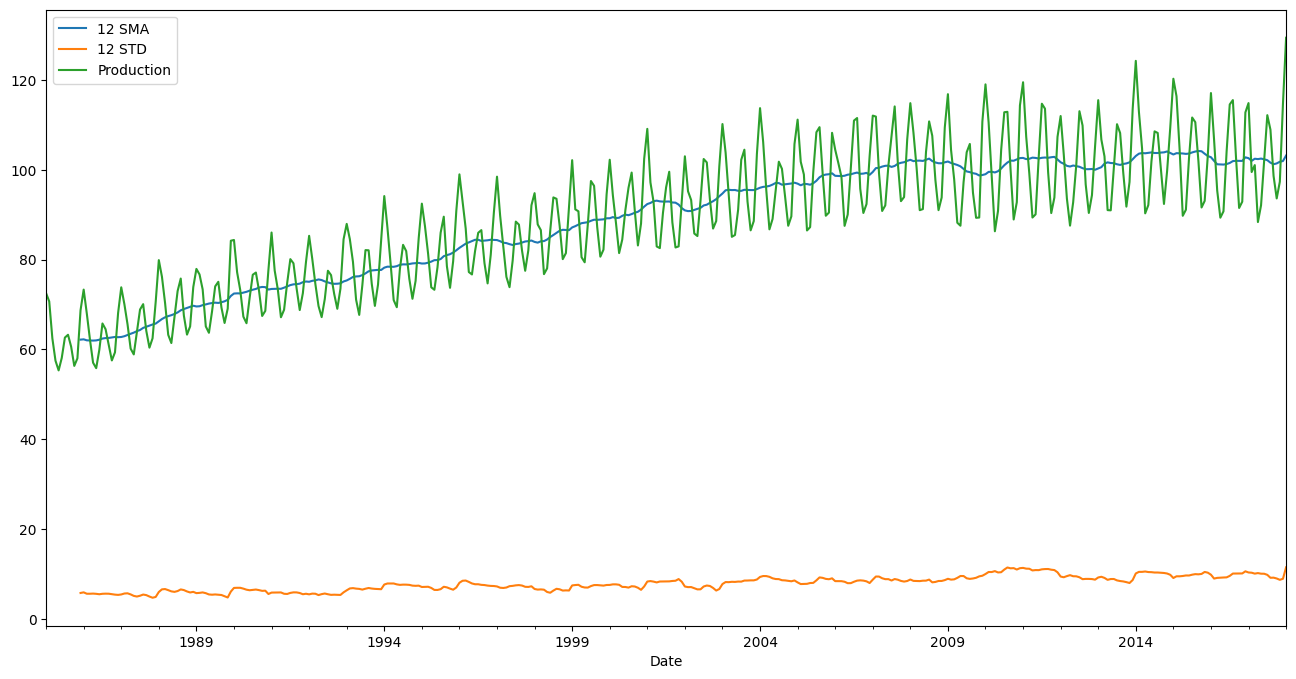

In [24]:
# 12 month simple moving average and standard deviation
df2['Production'].rolling(12).mean().plot(label='12 SMA',figsize=(16,8))
df2['Production'].rolling(12).std().plot(label='12 STD')
df2['Production'].plot()
plt.legend()
plt.show()

As seen from the above plot, the standard deviation is not varying much so there is not much variance.

Decomposition of the time series data to its trend, seasonality and residual components. The trend, seasonal and residual errors can be seen individually here.

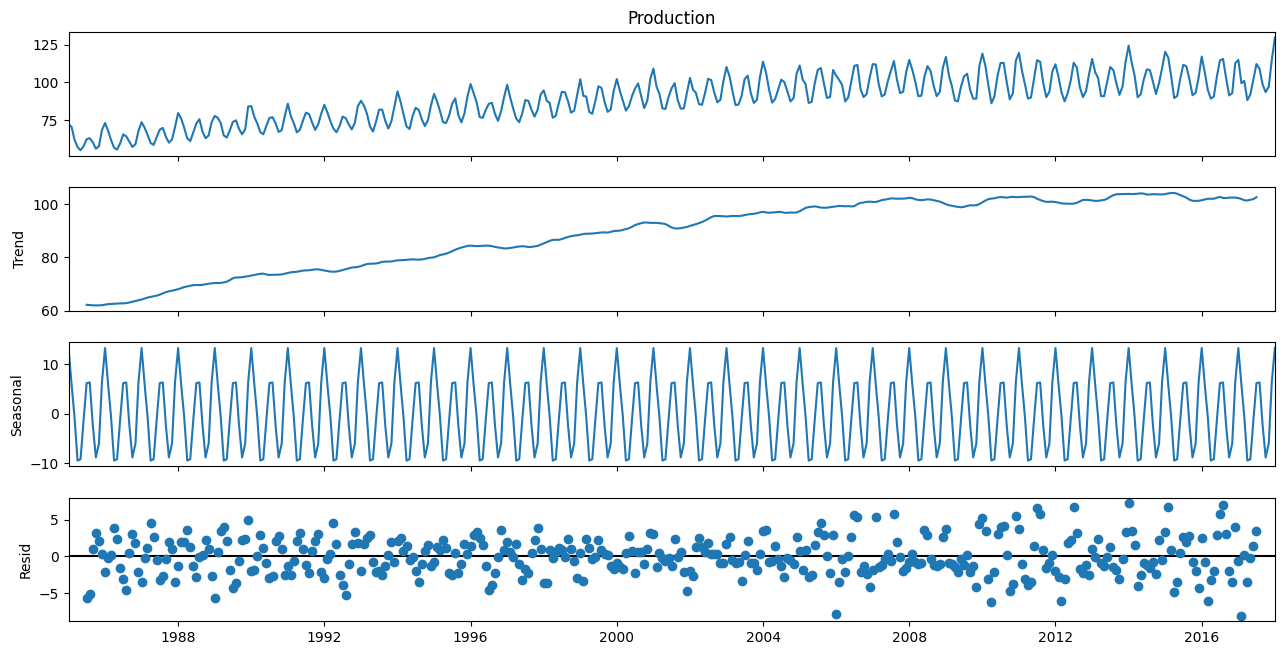

In [25]:
# Decompose time series
decomp = seasonal_decompose(df2['Production'])
fig = decomp.plot()
fig.set_size_inches(14,7)

**Plotting the ACF and PACF plot**

Text(0, 0.5, 'PACF')

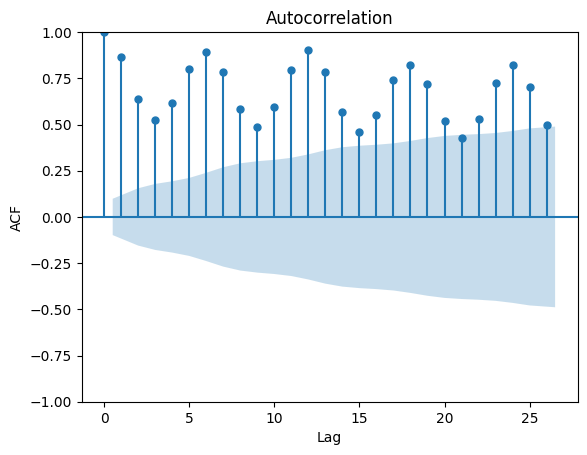

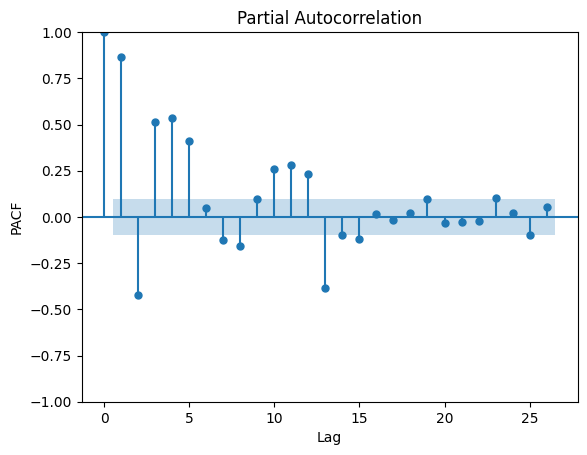

In [26]:
# Visualize ACF and PACF for Production series
p1 = plot_acf(df2['Production'].dropna()); plt.xlabel("Lag"); plt.ylabel("ACF")
p2 = plot_pacf(df2['Production'].dropna()); plt.xlabel("Lag"); plt.ylabel("PACF")

From the above plots, we can select the orders of autoregressive and moving average models i.e, p = 6 and q = 4.

**Constructing the ARMA model**

In [27]:
# Create ARMA(p=6, q=4) model
model = sm.ARIMA(df2['Production'].dropna(),order=(6, 0, 4))
# Fit model
results = model.fit()
results.summary()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Production   No. Observations:                  397
Model:                 ARIMA(6, 0, 4)   Log Likelihood               -1038.733
Date:                Sat, 02 Aug 2025   AIC                           2101.466
Time:                        17:57:24   BIC                           2149.274
Sample:                    01-01-1985   HQIC                          2120.404
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         88.8163     65.574      1.354      0.176     -39.707     217.339
ar.L1          1.7732      0.977      1.815      0.069      -0.141       3.687
ar.L2         -0.7700      2.698     -0.285      0.775      -6.059       4.519
ar.L3         -0.9991      3.456     -0.289      0.772      -7.772       5.774
ar.L4          1.7668      2.495      0.708      0.479      -3.124       6.657
ar.L5         -0.7728      0.783     -0.987      0.324      -2.308       0.763
ar.L6          0.0018      0.060      0.031      0.975      -0.115       0.119
ma.L1         -0.9989      0.996     -1.003      0.316      -2.951       0.953
ma.L2         -0.0504      1.984     -0.025      0.980      -3.938       3.838
ma.L3          1.0479      1.938      0.541      0.589      -2.750       4.845
ma.L4         -0.8994      0.894     -1.006      0.315      -2.652       0.853
sigma2        10.7038      0.718     14.902      0.000       9.296      12.112
===================================================================================
Ljung-Box (L1) (Q):                   0.64   Jarque-Bera (JB):                10.45
Prob(Q):                              0.43   Prob(JB):                         0.01
Heteroskedasticity (H):               1.94   Skew:                             0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Predicting or forecasting**

By predicting the values, the model's performance can be ascertained. First, we can look into how it predicts the present data and then we move onto predicting future data.

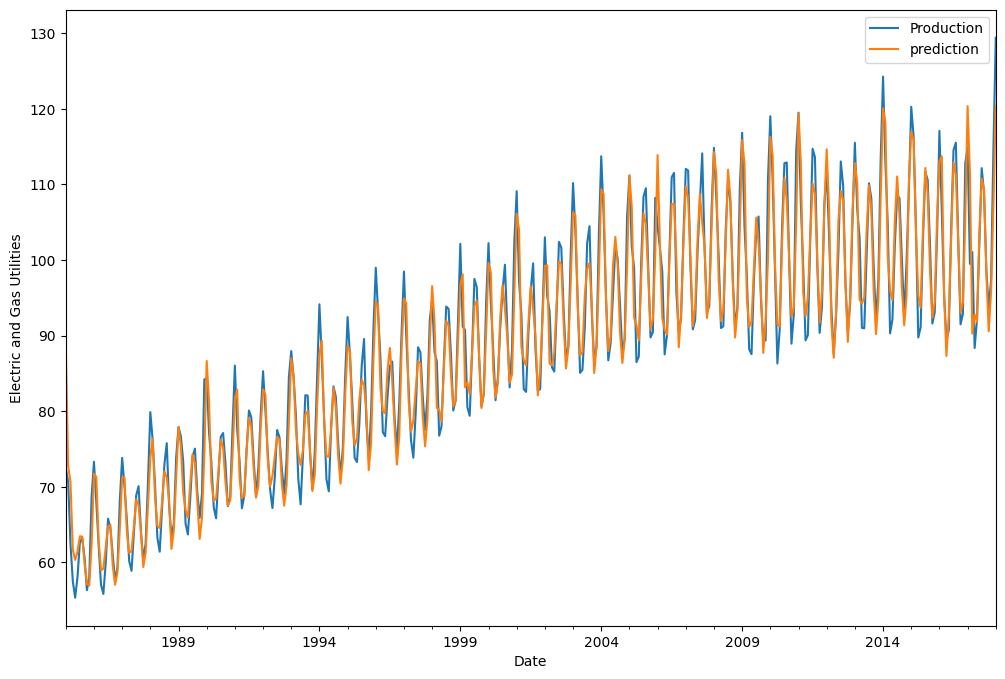

In [28]:
# Predict present data
df2['prediction'] = results.predict()
df2[['Production','prediction']].plot(figsize=(12,8))
plt.ylabel("Electric and Gas Utilities")
plt.show()

As seen from the above plot, the model does a good job of predicting the present data. Now to predict for the future, we can add more months to the dataset with null values and predict for it. The last index is obtained which is the last date and a month offset is added to it which starts from 1 and goes up to 24.

In [29]:
# Last five values of dataset
df2.tail()

,Production,prediction
Date,,
2017-09-01,98.6154,98.090234
2017-10-01,93.6137,90.564628
2017-11-01,97.3359,95.799356
2017-12-01,114.7212,107.244322
2018-01-01,129.4048,120.384124


In [30]:
# Create extra index dates
extra_dates = [df2.index[-1] + DateOffset(months=m) for m in range (1,24)]
extra_dates

[Timestamp('2018-02-01 00:00:00'),
 Timestamp('2018-03-01 00:00:00'),
 Timestamp('2018-04-01 00:00:00'),
 Timestamp('2018-05-01 00:00:00'),
 Timestamp('2018-06-01 00:00:00'),
 Timestamp('2018-07-01 00:00:00'),
 Timestamp('2018-08-01 00:00:00'),
 Timestamp('2018-09-01 00:00:00'),
 Timestamp('2018-10-01 00:00:00'),
 Timestamp('2018-11-01 00:00:00'),
 Timestamp('2018-12-01 00:00:00'),
 Timestamp('2019-01-01 00:00:00'),
 Timestamp('2019-02-01 00:00:00'),
 Timestamp('2019-03-01 00:00:00'),
 Timestamp('2019-04-01 00:00:00'),
 Timestamp('2019-05-01 00:00:00'),
 Timestamp('2019-06-01 00:00:00'),
 Timestamp('2019-07-01 00:00:00'),
 Timestamp('2019-08-01 00:00:00'),
 Timestamp('2019-09-01 00:00:00'),
 Timestamp('2019-10-01 00:00:00'),
 Timestamp('2019-11-01 00:00:00'),
 Timestamp('2019-12-01 00:00:00')]

Now another dataframe is created with these extra future date values as index and the rest of the column values as null.

In [31]:
# Create new dataframe with extra index dates
forecast_df = pd.DataFrame(index=extra_dates,columns=df2.columns)
forecast_df.head()

,Production,prediction
2018-02-01,NaN,NaN
2018-03-01,NaN,NaN
2018-04-01,NaN,NaN
2018-05-01,NaN,NaN
2018-06-01,NaN,NaN


Now the original dataframe and this forecast dataframe are concatenated into a single one for forecasting.

In [32]:
# Concat dataframes
final_df = pd.concat([df2,forecast_df])
final_df.tail()

,Production,prediction
2019-08-01,NaN,NaN
2019-09-01,NaN,NaN
2019-10-01,NaN,NaN
2019-11-01,NaN,NaN
2019-12-01,NaN,NaN


Now we can predict the values for the end data points by mentioning the start and end arguments while calling the 'predict' function.

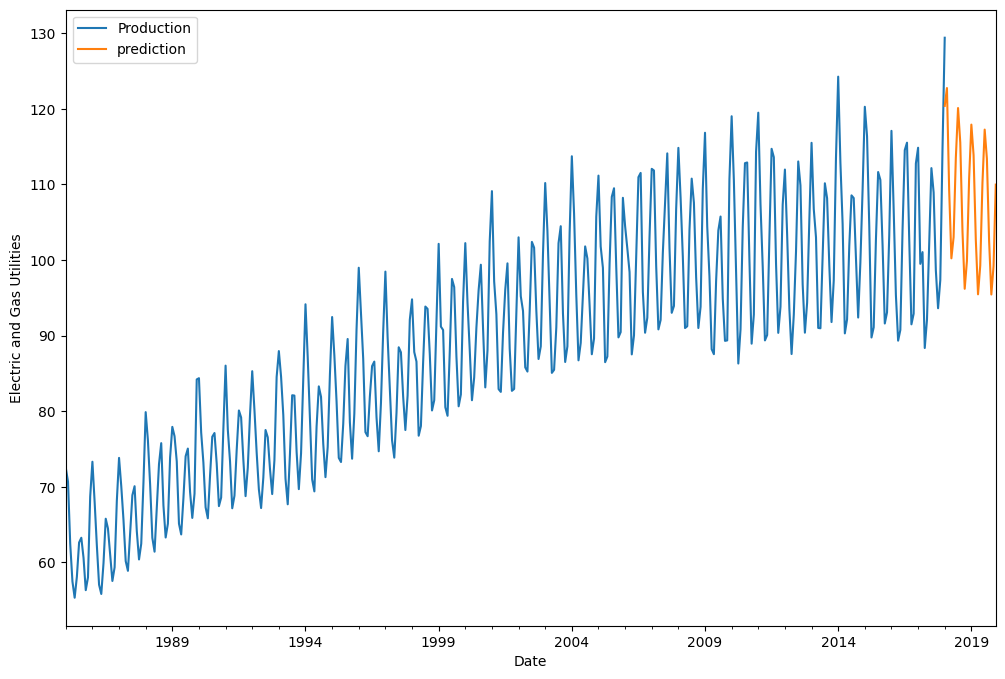

In [33]:
# Visualize prediction for extra index dates
final_df['prediction'] = results.predict(start=396, end=430)
final_df[['Production','prediction']].plot(figsize=(12,8))
plt.xlabel("Date")
plt.ylabel("Electric and Gas Utilities")
plt.show()

The prediction line can be seen clearly for the future values.